In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Food-Truck-LineReg.csv", header = None)
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       97 non-null     float64
 1   1       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
df.columns = ["X", "Y"]
df.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Y -->')

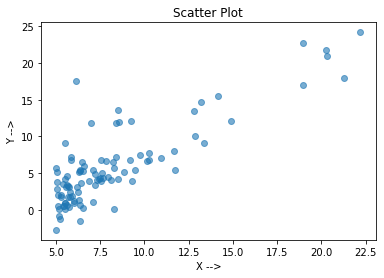

In [5]:
x, y = df['X'], df['Y']
plt.scatter(x, y, c = None, s = None, alpha = 0.6)
plt.title('Scatter Plot')
plt.xlabel('X -->')
plt.ylabel('Y -->')

0.837873232526341

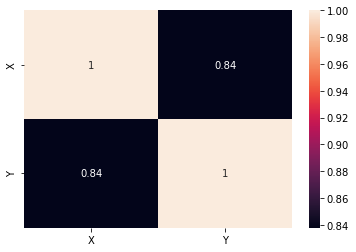

In [6]:
heatMap = sns.heatmap(df.corr(), annot = True)
df['Y'].corr(df['X'])

In [7]:
Xsquare = []
Ysquare = []
XY = []
for i in range(len(df)):
    Xsquare.append((df.X[i] ** 2))
    Ysquare.append(df.Y[i] ** 2)
    XY.append(df.Y[i] * df.X[i])

df['Xsquare'] = Xsquare
df['Ysquare'] = Ysquare
df['XY'] = XY
df.head()

,X,Y,Xsquare,Ysquare,XY
0,6.1101,17.5920,37.333322,309.478464,107.488879
1,5.5277,9.1302,30.555467,83.360552,50.469007
2,8.5186,13.6620,72.566546,186.650244,116.381113
3,7.0032,11.8540,49.044810,140.517316,83.015933
4,5.8598,6.8233,34.337256,46.557423,39.983173


In [8]:
SumX = df['X'].sum()
SumY = df['Y'].sum()
SumXsq = df['Xsquare'].sum()
SumYsq = df['Ysquare'].sum()
SumXY = df['XY'].sum()
print(SumX, SumY, SumXsq, SumYsq, SumXY)    

791.5006 566.3961 7896.18245374 6222.110372226401 6336.898425319001


In [9]:
tempX = 0
tempY = 0
for i in range(len(df)):
    tempX = tempX + (((df.X[i] - (SumX / len(df))) ** 2))
    tempY = tempY + (((df.Y[i] - (SumY / len(df))) ** 2))
                     
varianceX = tempX / len(df) 
varianceY = tempY / len(df) 
sdX = (varianceX) ** (1/2)
sdY = (varianceY) ** (1/2)
print(sdX, sdY)

3.849883995922715 5.48178525707763


In [10]:
regC = (SumXY / (SumXsq * SumYsq))
regC

0.0001289798478637717

In [11]:
slopeM = (regC * (sdY / sdX))
slopeM

0.00018365224230874015

In [12]:
C = (SumY / len(df)) - (slopeM * (SumX / len(df)))
C

5.837636485979602

In [13]:
PredY = []
for i in range(len(df)):
    PredY.append((slopeM * df.X[i] + C))

df['PredY'] = PredY
df.head()

,X,Y,Xsquare,Ysquare,XY,PredY
0,6.1101,17.5920,37.333322,309.478464,107.488879,5.838759
1,5.5277,9.1302,30.555467,83.360552,50.469007,5.838652
2,8.5186,13.6620,72.566546,186.650244,116.381113,5.839201
3,7.0032,11.8540,49.044810,140.517316,83.015933,5.838923
4,5.8598,6.8233,34.337256,46.557423,39.983173,5.838713


In [14]:
def grad_desc(m, c):
    l_rate = 0.001
    pred = []
    cSum = 0
    mSum = 0
    
    for i in range(len(df)):
        pred.append(m * df.X[i] + c)
        
    for i in range(len(df)):
        mSum += df.X[i] * (df.Y[i] - df.PredY[i])
        cSum += (df.Y[i] - df.PredY[i])
        
    mGrad = (-2 / len(df)) * mSum
    cGrad = (-2 / len(df)) * cSum
    
    m -= l_rate * mGrad
    c -= l_rate * cGrad
    
    return m, c, pred

In [15]:
for i in range(10000):
    slopeM, C, df['PredY'] = grad_desc(slopeM, C)

In [16]:
PredYSum = (df['PredY'].sum())
sse = 0
sst = 0
ssr = 0
for i in range(len(df)):
    sse = sse + ((df.Y[i] - df.PredY[i]) ** 2)
    ssr = ssr + ((df.PredY[i] - (PredYSum / len(df))) ** 2)
    sst = sst + ((df.Y[i] - (SumY / len(df))) ** 2)

cost = sse
rSquare = 1 - (sse / sst)

In [17]:
cost

869.770266011803

In [18]:
sse

869.770266011803

In [19]:
sst

2914.8470516572247

In [20]:
ssr

1956.0969326730028

In [21]:
rSquare

0.701606893741715

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


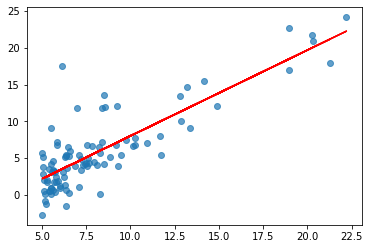

In [22]:
plt.scatter(df['X'], df['Y'], alpha = 0.7)
plt.plot(df['X'], df['PredY'], color = 'red')

In [23]:
df

,X,Y,Xsquare,Ysquare,XY,PredY
0,6.1101,17.59200,37.333322,309.478464,107.488879,3.496008
1,5.5277,9.13020,30.555467,83.360552,50.469007,2.816675
2,8.5186,13.66200,72.566546,186.650244,116.381113,6.305374
3,7.0032,11.85400,49.044810,140.517316,83.015933,4.537754
4,5.8598,6.82330,34.337256,46.557423,39.983173,3.204049
...,...,...,...,...,...,...
92,5.8707,7.20290,34.465118,51.881768,42.286065,3.216763
93,5.3054,1.98690,28.147269,3.947772,10.541299,2.557376
94,8.2934,0.14454,68.780484,0.020892,1.198728,6.042692
95,13.3940,9.05510,179.399236,81.994836,121.284009,11.992226
